### Apartado -01

Ejemplo 1: Cargar un dataset de tweets desde Kaggle: https://www.kaggle.com/datasets/kazanova/sentiment140

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment140


In [ ]:
import pandas as pd


df = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)
df.columns = ["sentiment", "id", "date", "query", "user", "text"]

# Tamaño del dataset
df.shape

(1600000, 6)

In [ ]:
# Visualizar los primeros ejemplos
df.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Visualizar un ejemplo en concreto

print(df.loc[200, "sentiment"])
df.loc[200, "text"]

0


'Job Interview in Cardiff today, wish me luck! Got about 3 hours sleep '

Ejemplo 2: Cargar datasets desde Hugging Face directamente en Google Colab: https://huggingface.co/docs/datasets/en/index

In [ ]:
!pip install datasets

In [ ]:
import pandas as pd

splits = {'train': 'data/train-00000-of-00001-40d9940488cb84b1.parquet', 'test': 'data/test-00000-of-00001-9cc7bacfd2a73ac7.parquet'}
df = pd.read_parquet("hf://datasets/alexcom/analisis-sentimientos-textos-turisitcos-mx-polaridad/" + splits["train"])

In [ ]:
# Tamaño del dataset
df.shape

(176192, 2)

In [ ]:
# Visualizar los primeros ejemplos
df.head()

,text,label
0,el mejor lugar para comer sushi. excelente lug...,5
1,vista hermosa!. me sorprendió la maravillosa v...,5
2,"desastroso. buenas noches, ante todo explicar...",1
3,todo bien excepto que se niegan a dar vasos de...,3
4,el mejor zoologico de méxico. el ambiente es m...,5


In [ ]:
# Visualizar un ejemplo en concreto
print(df.loc[0,"label"])
df.loc[0,"text"]

5


'el mejor lugar para comer sushi. excelente lugar para comer sushi! toda una experiencia que recomiendo.\nlos\nmartes de ronqueo vale\nmucho la\npena el espectáculo y el\natun que se sirve.'

### Apartado -02

#### Implementación paso a paso con Python (usando NLTK)

Paso 1: Instalación

In [ ]:
!pip install nltk #  instalar la biblioteca NLTK
import nltk # importa el módulo nltk
nltk.download('punkt_tab') # Descarga el tokenizador punkt, que permite dividir textos en oraciones o palabras. Es esencial para dividir frases en tokens
nltk.download('stopwords') # Descarga la lista de palabras vacías (stopwords), como “el”, “de”, “y”, que suelen eliminarse porque no aportan mucho significado al análisis.
nltk.download('wordnet') # Descarga el corpus WordNet, una base de datos léxica del inglés. Es necesaria para tareas como lematización, donde las palabras se reducen a su forma base (por ejemplo, “running” → “run”).

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

 Paso 2: Texto de ejemplo

In [ ]:
texto = "@juan ¡Me encantó la nueva serie en Netflix! 😍 Mira esto: https://bit.ly/serie #Imperdible"
print(texto)

@juan ¡Me encantó la nueva serie en Netflix! 😍 Mira esto: https://bit.ly/serie #Imperdible


 Paso 3: Eliminación de menciones, links, hashtags, y emoticonos

In [ ]:
import re

def limpiar_texto(texto):
    texto = re.sub(r'@\w+', '', texto)             # Menciones
    texto = re.sub(r'http\S+', '', texto)          # URLs
    texto = re.sub(r'#\w+', '', texto)             # Hashtags
    texto = re.sub(r'[^\w\s]', '', texto)          # Caracteres especiales
    texto = texto.lower()                          # A minúsculas
    return texto.strip()

texto_limpio = limpiar_texto(texto)
print(texto_limpio) # Salida esperada: "me encantó la nueva serie en netflix mira esto"

me encantó la nueva serie en netflix  mira esto


1.   **re** es el módulo de expresiones regulares en Python. Permite buscar y reemplazar patrones en texto de forma flexible y poderosa.
2.   **re.sub(r'@\w+', '', texto)**: Elimina menciones a usuarios como @usuario.
  * **r** indica una raw string (cadena sin interpretar), útil para evitar conflictos con los caracteres especiales de las expresiones regulares.
  * **@\w+** busca una arroba seguida de letras o números (el nombre del usuario).







 Paso 4: Tokenización, eliminación de stopwords y lematización

In [ ]:
from nltk.tokenize import word_tokenize # Para dividir el texto en palabras (tokens)
from nltk.corpus import stopwords # Para obtener las palabras vacías (como "de", "la", "y")
from nltk.stem import WordNetLemmatizer # Para reducir palabras a su forma base (lematización)

stop_words = set(stopwords.words('spanish'))  # Lista de stopwords en español
lemmatizer = WordNetLemmatizer() # Inicializa el lematizador

tokens = word_tokenize(texto_limpio) # Tokeniza el texto limpio
tokens_filtrados = [t for t in tokens if t not in stop_words] # Elimina stopwords
tokens_lematizados = [lemmatizer.lemmatize(t) for t in tokens_filtrados] # Lematiza cada token

print(tokens_lematizados) # Salida esperada: ['encantó', 'nueva', 'serie', 'netflix', 'mira']

['encantó', 'nueva', 'serie', 'netflix', 'mira']


#### Implementación paso a paso con Python (usando spaCy)

Paso 1: Instalación

In [ ]:
!pip install spacy  # Instala la biblioteca spaCy (procesamiento de lenguaje natural)
!python -m spacy download es_core_news_sm # Descarga el modelo pequeño de spaCy para español

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 94.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Paso 2: Texto de ejemplo

In [ ]:
texto = "@juan ¡Me encantó la nueva serie en Netflix! 😍 Mira esto: https://bit.ly/serie #Imperdible"
print(texto)

@juan ¡Me encantó la nueva serie en Netflix! 😍 Mira esto: https://bit.ly/serie #Imperdible


Paso 4: Tokenización, eliminación de stopwords y lematización

In [ ]:
import spacy # Importa la biblioteca spaCy
nlp = spacy.load("es_core_news_sm") # Carga el modelo de español previamente descargado

doc = nlp(texto_limpio)  # Procesa el texto con el modelo (tokeniza, analiza, lematiza)
tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
# Extrae lemas (formas base), excluyendo stopwords y signos de puntuación

print(tokens)

['encantar', 'serie', 'netflix', ' ', 'mira']


### Apartado -03

#### Implementación en Python con scikit-learn para Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Importa herramientas para vectorizar texto (BoW y TF-IDF)

# Datos de ejemplo
corpus = [
    "Me encantó el producto, lo recomiendo totalmente",
    "No me gustó el producto, llegó dañado",
    "El producto es bueno, pero el envío fue lento",
]

# Bolsa de Palabras (Bag of Words)
vectorizer_bow = CountVectorizer()             # Crea el vectorizador basado en frecuencia de palabras
X_bow = vectorizer_bow.fit_transform(corpus)   # Ajusta el vectorizador al texto y transforma el corpus en una matriz numérica

print("=== Bag of Words ===")
print("====================")
print(vectorizer_bow.get_feature_names_out())  # Muestra el vocabulario generado (palabras únicas)
print("====================")
print(X_bow.toarray())                         # Muestra la matriz resultante (frecuencias por texto)

=== Bag of Words ===
['bueno' 'dañado' 'el' 'encantó' 'envío' 'es' 'fue' 'gustó' 'lento'
 'llegó' 'lo' 'me' 'no' 'pero' 'producto' 'recomiendo' 'totalmente']
[[0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1]
 [0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0]
 [1 0 2 0 1 1 1 0 1 0 0 0 0 1 1 0 0]]


Implementación en Python con TF-IDF

In [ ]:
# TF-IDF
vectorizer_tfidf = TfidfVectorizer()             # Crea el vectorizador TF-IDF
X_tfidf = vectorizer_tfidf.fit_transform(corpus) # Ajusta el vectorizador y transforma el corpus en una matriz ponderada

print("=== TF-IDF ===")
print("====================")
print(vectorizer_tfidf.get_feature_names_out())  # Muestra el vocabulario generado (palabras únicas)
print("====================")
print(X_tfidf.toarray())                         # Muestra la matriz resultante con los valores TF-IDF por palabra y por texto

=== TF-IDF ===
['bueno' 'dañado' 'el' 'encantó' 'envío' 'es' 'fue' 'gustó' 'lento'
 'llegó' 'lo' 'me' 'no' 'pero' 'producto' 'recomiendo' 'totalmente']
[[0.         0.         0.25712876 0.43535684 0.         0.
  0.         0.         0.         0.         0.43535684 0.3311001
  0.         0.         0.25712876 0.43535684 0.43535684]
 [0.         0.43535684 0.25712876 0.         0.         0.
  0.         0.43535684 0.         0.43535684 0.         0.3311001
  0.43535684 0.         0.25712876 0.         0.        ]
 [0.35934656 0.         0.42447173 0.         0.35934656 0.35934656
  0.35934656 0.         0.35934656 0.         0.         0.
  0.         0.35934656 0.21223587 0.         0.        ]]


 Ejemplo en Python: Embeddings con sentence-transformers (BERT)

In [ ]:
!pip install -q sentence-transformers
# Instala la librería Sentence Transformers (basada en modelos tipo BERT, útil para obtener embeddings de frases)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.2 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer  # Importa la clase que permite cargar y usar modelos preentrenados

# Cargamos un modelo preentrenado (BERT pequeño optimizado para velocidad y rendimiento)
model = SentenceTransformer('all-MiniLM-L6-v2')

# Texto de ejemplo
texts = [
    "Este producto es excelente",
    "Él camarero fue muy amable",
    "No me gustó para nada el servicio",
]

# Obtenemos los embeddings para cada frase del listado
embeddings = model.encode(texts)

# Mostramos la dimensión del vector generado para una de las frases
print(f"Cada texto está representado por un vector de {embeddings[0].shape[0]} dimensiones")

Cada texto está representado por un vector de 384 dimensiones


Visualización básica de embeddings con PCA

Nota rápida sobre PCA: PCA (Análisis de Componentes Principales) es una técnica que reduce la cantidad de dimensiones de los datos para poder visualizarlos más fácilmente, manteniendo la estructura general.
En este caso, la usamos solo para ver los vectores de texto en 2D, pero no es necesario entender su funcionamiento interno para seguir el curso.


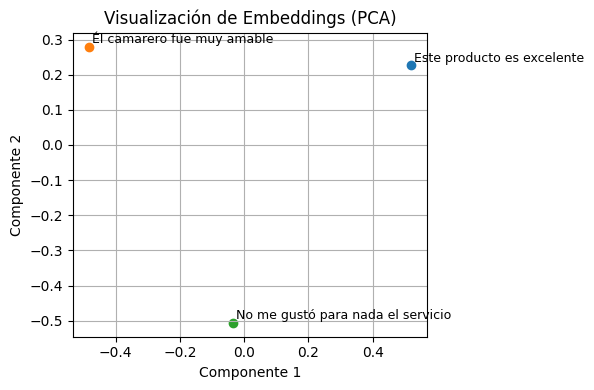

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducimos los embeddings a 2 dimensiones con PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Creamos un gráfico
plt.figure(figsize=(6, 4))
for i, text in enumerate(texts):
    x, y = embeddings_2d[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, text, fontsize=9)

plt.title("Visualización de Embeddings (PCA)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2.2.3.	Análisis Exploratorio del Texto

Paso 1: Cargamos un dataset (tweets de ejemplo)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset de ejemplo
data = {
    'tweet': [
        'Me encanta este producto 😍',
        'Muy mala atención al cliente 😡',
        'Lo recomiendo totalmente!',
        'No volvería a comprar esto.',
        'Excelente relación calidad/precio!, Me encanta'
    ]
}
df = pd.DataFrame(data)
df

,tweet
0,Me encanta este producto 😍
1,Muy mala atención al cliente 😡
2,Lo recomiendo totalmente!
3,No volvería a comprar esto.
4,"Excelente relación calidad/precio!, Me encanta"


Paso 2: Longitud del texto

In [ ]:
df['char_count'] = df['tweet'].apply(len) # Calcula la cantidad de caracteres en cada tweet y lo guarda en una nueva columna llamada 'char_count'
df['word_count'] = df['tweet'].apply(lambda x: len(x.split())) # Calcula la cantidad de palabras en cada tweet y lo guarda en una nueva columna llamada 'word_count'

df

,tweet,char_count,word_count
0,Me encanta este producto 😍,26,5
1,Muy mala atención al cliente 😡,30,6
2,Lo recomiendo totalmente!,25,3
3,No volvería a comprar esto.,27,5
4,"Excelente relación calidad/precio!, Me encanta",46,5


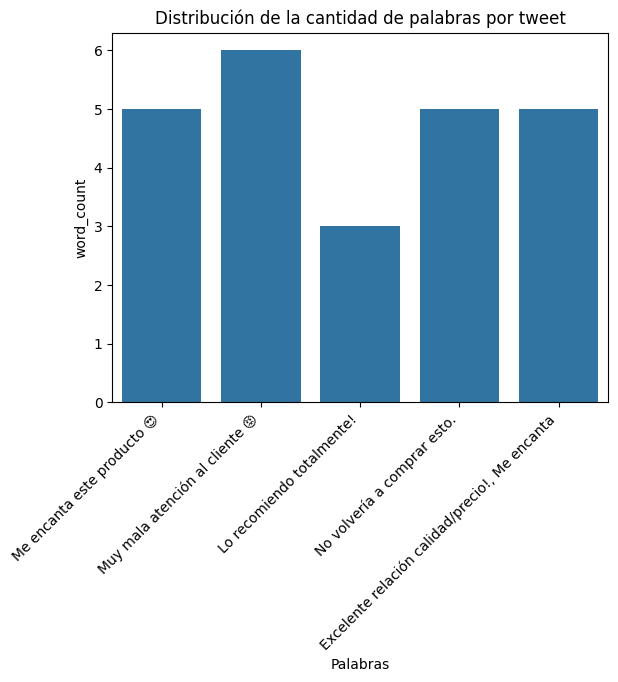

In [ ]:
sns.barplot(x=df['tweet'], y=df['word_count']) # Crea un grafico de barras con la distribución del número de palabras por tweet
plt.xticks(rotation=45, ha='right') # Rotación de 45°
plt.title("Distribución de la cantidad de palabras por tweet") # Agrega un título al gráfico
plt.xlabel("Palabras") # Etiqueta el eje X del gráfico
plt.show()

Paso 3: Palabras más frecuentes

In [ ]:
from collections import Counter  # Para contar frecuencia de palabras
import nltk  # Librería de procesamiento de lenguaje natural
from nltk.corpus import stopwords  # Stopwords en distintos idiomas
import re  # Expresiones regulares para limpieza de texto

nltk.download('stopwords')  # Descarga lista de stopwords
stop_words = set(stopwords.words('spanish'))  # Define stopwords en español

# Función para limpiar texto: minúsculas, solo letras, sin stopwords
def clean_text(text):
    text = text.lower()  # Convierte a minúsculas
    text = re.sub(r'[^a-záéíóúñü ]', '', text)  # Elimina caracteres no alfabéticos
    return ' '.join([word for word in text.split() if word not in stop_words])  # Elimina stopwords

all_words = ' '.join(df['tweet'].apply(clean_text)).split()  # Unifica todos los textos y separa en palabras
word_freq = Counter(all_words).most_common(10)  # Cuenta las 10 palabras más frecuentes

print("Palabras más frecuentes:")
word_freq  # Muestra resultado

Palabras más frecuentes:


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('encanta', 2),
 ('producto', 1),
 ('mala', 1),
 ('atención', 1),
 ('cliente', 1),
 ('recomiendo', 1),
 ('totalmente', 1),
 ('volvería', 1),
 ('comprar', 1),
 ('excelente', 1)]

Paso 4: Nube de palabras

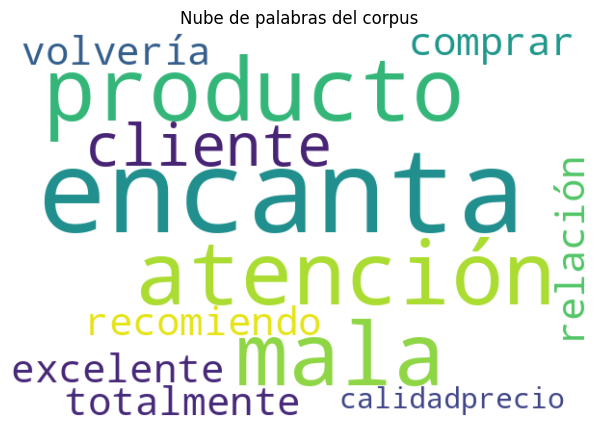

In [ ]:
from wordcloud import WordCloud  # Importa clase para generar nubes de palabras

# Genera la nube de palabras a partir del texto limpio
wordcloud = WordCloud(background_color='white', width=600, height=400).generate(' '.join(all_words))

plt.figure(figsize=(8, 5))  # Define el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Muestra la nube de palabras con suavizado
plt.axis('off')  # Oculta los ejes
plt.title("Nube de palabras del corpus")  # Título del gráfico
plt.show()  # Muestra la visualización

Paso 5: Emoji Analysis

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 11.1 MB/s eta 0:00:00


In [ ]:
import emoji  # Librería para trabajar con emojis

# Extrae todos los emojis presentes en un texto
def extract_emojis(text):
    return ''.join(char for char in text if char in emoji.EMOJI_DATA)

df['emojis'] = df['tweet'].apply(extract_emojis)  # Aplica la función a cada tweet y guarda el resultado
print("Emojis usados:", df['emojis'].value_counts())  # Muestra los emojis más frecuentes

Emojis usados: emojis
     3
😍    1
😡    1
Name: count, dtype: int64


### Ejercicio de aprendizaje

Paso 1: Cargar el dataset simulado

In [ ]:
import pandas as pd

data = {
    'usuario': ['@juan', '@lucia', '@andres'],
    'tweet': [
        "¡Me encantó! 😍 Lo recomiendo http://producto.com",
        "No me gustó para nada. Muy malo 😡 #decepcionado",
        "@tienda No llegó mi pedido. ¿Qué pasó?"
    ]
}

df = pd.DataFrame(data)
df

Paso 2: Limpieza de texto

In [ ]:
import re

def limpiar(texto):
    texto = texto.lower()
    texto = re.sub(r"http\S+|@\w+|#\w+|[^\w\s]", "", texto)
    return texto.strip()

df["limpio"] = df["tweet"].apply(limpiar)
df[["tweet", "limpio"]]
